<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color=#555555><font size=6> Ingeniería Financiera </font> <br> <br>

<center><font color=#555555><font size=5> ITE1731 - Microestructura y Sistemas de Trading </font> <br> <br> <br>

<center><font color=#555555><font size=5> I.F. Luis María Ramírez de la Rosa </font> <br> <br>
    
<center><font color=#555555><font size=5> I.F. Erendira Marín Haro </font> <br> <br>
    
<center><font color=#555555><font size=5> I.F. Jesús Manuel Salomón Calderón </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Diciembre 2020 </a> | <font color= #555555> <font size = 4> Repositorio: <a href='https://github.com/luismaria8992ramirez/myst_proyecto_eq5'>Link</a></font>

<br>

---

<br>

<br>

<center> <font color= #555555> <font size = 7> Laboratorio Final </font> <br> <br> <font color= #555555> <font size = 5> Análisis Fundamental </font>

# <font color= #555555> <font size = 5> Abstract </font>

<font color= #6B6B6B> <font size = 2> Este documento fue elaborado por tu Luis María Ramíres de la Rosa, Erendira Marín Haro y Jesús Manuel Salomón Calderón, como un trabajo parcial para la materia de **Microestructura y Sistemas de Trading - ITE1731**, la cual es parte del curriculum de la licenciatura en Ingeniería Financiera, ofertada por la universidad **ITESO**. En el presente trabajo se busca analizar el comunicado de un indicador económico como un evento que puede generar patrones temporales en las reacciones del precio de un activo financiero. Con estas reacciones del precio, se busca detectar patrones y utilizarlos para construir un sistema de trading.</font> 

<br>

# <font color= #6B6B6B> <font size = 6> 0. Librerías y Dependencias </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 5> 0.1 Librerías </font> <font color= #555555>

Para correr este notebook es necesario tener instaladas y/o en el archivo _requirements.txt_ las siguientes librerías :

- pandas>=1.1.0
- numpy>=1.19.1
- jupyter>=1.0.0

- scipy~=1.5.4
- matplotlib~=3.3.2
- oandapyV20~=0.6.3
- statsmodels~=0.12.1
- patsy~=0.5.1
- ipython~=7.16.1

In [1]:
# Librerias para Aspectos Financieros
import numpy as np
import pandas as pd
import scipy.stats as st 
from datetime import timedelta
import matplotlib.pyplot as plt
from oandapyV20 import API
import oandapyV20.endpoints.instruments as instruments
import warnings
warnings.filterwarnings("ignore")
# Librerias para Aspectos Estadisticos
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.tsa.stattools import adfuller
# Librerias para Aspectos Comouracionales
# Librerias para BackTest
from IPython import display

# <font color= #6B6B6B> <font size = 5> 0.2 Dependencias </font> <font color= #555555>

Para correr este notebook es necesario contar con los siguientes archivos y dependencias externas:

- files/Fed Interest Rate Decision - United States.txt : Comunicados históricos

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

El análisis fundamental es un tipo de análisis bursátil analiza variables que afectan a su valor. Estas variables no son indicadors técnicos, al contrario, son indicadores externos a los activos financieros, pero si los afectan, algunos ejemplos comunes son la tasa de interes, el nivel de desempleo, inflación, producto interno bruto (PIB) o Gross Domestic Product (GDP) por sus siglas en inglés entre muchos otros.

Estos indicadores son publicados de forma periódica por instituciones gubernamentales o privadas y es usual que durante un periodo de tiempo previo y posterior a la publicacion de estos indicadores fr tipo **fundamental** provocan cambios de mayor magnitud a los habituales en diversos activos del mercado financiero.

En este proyecto se pretende analizar el activo XAG_USD y como este cambia cuando hay comuncados de la Tasa de Interés en EE.UU. Y diseñar un modelo de trading parametrizado que máximize las ganancias haciendo *trades* en dichos lapsos de tiempo.

<br>

# <font color= #6B6B6B> <font size = 6> 2. Objetivos </font>

<hr style="border:0.02in solid gray"> </hr>

Se analiza el comportamiento del XAG_USD durante el comunicado del indicador FED INTEREST RATE DECISION de la economía USA.

<br>

# <font color= #6B6B6B> <font size = 6> 3. Aspectos Financieros </font>

<hr style="border:0.02in solid gray"> </hr>

### Objeto de Análisis
Se analiza el comportamiento del XAG_USD durante el comunicado del indicador FED INTEREST RATE DECISION de la economía USA.

**Explicación del Indicador:** 
* 1.- Cuantas veces al año: Ocho veces, en miércoles. 
* 2.- Quien lo emite: El Comité Federal de Mercado Abierto (FOMC) de la Reserva Federal Americana
* 3.- Sobre que indicador trata: tasas de interés a corto plazo para la Nación (USA)
* 4.- Qué se publica: una declaración con la tasa establecida, además de un breve comentario sobre las condiciones económicas que afectaron la decisión.
* 5.- Principales indicadores (otros) que afectan a este: inflación
* 6.- Objeto de comunicado: lograr estabilidad en los precios, es decir controlar la inflación.
* 7.- Efectos colaterales significativos del comunicado: 
    * a) atraer y retirar inversión extranjera
    * b) lo anterior afecta la oferta/demanda de la moneda de USA
    * c) fluctiaciones significaticas en los precios de los papeles gubernamentales
* 8.- Consideraciones adicionales: 
   *  a) Por lo general el mercado se adelanta a la publicación de la FED cuando se considera que el consenso es acertado y aceptado por una buena parte del mercado. Esto hace que la fluctuación de precios en instrumentos de mercado despúes de la publicación sea menor tras el comunicado. 
   * b) Alternativamente, cuando el consenso no es del todo aceptado por la mayoría del mercado, este espera el el anuncio del comunicado y actua inmediatamente. 
   * c) Finalmente hay un tercer escenario medianamente común, cuando sucede una sorpresa en el comunicado, el mercado en su mayoría cree que la decisión serña una, pero se comunica algo no esperado, ahi es cuando los se dan los mayores cambios tras el comunicado.

**Criterios a considerar para el análisis financiero:**
* 1.- Por lo general, cuando la inflación supera una tasa anual aproximada de 2%, el banco central responderá aumentando las tasas de interés, con el fin de reducir los precios
Del indicador que se eligió, hay datos desde el 29 de junio de 2006 hasta el 29 de enero de 2020, por lo que se filtraran los datos para hacer el analisis de toma de decisiones.


Del indicador que se eligió, hay datos desde el 29 de junio de 2006 hasta el 29 de enero de 2020, por lo que se filtraran los datos para hacer el analisis de toma de decisiones.

In [2]:
ind_dir = 'Files/' + 'Fed Interest Rate Decision - United States.txt'  # directorio del indicador
df = pd.read_csv( ind_dir, sep=",", header=0)  # Importacion
df['DateTime']= pd.to_datetime(df['DateTime'])  # Fechas en formato fecha
df = df[df['DateTime'] > '28/02/2018']  # Filtrar ultimos 2 años
# Columnas: 'DateTime', 'Actual', 'Consensus', 'Previous', 'Revised'
df.head(3)

,DateTime,Actual,Consensus,Previous,Revised
0,2020-01-29 19:00:00,1.75,1.75,1.75,NaN
1,2019-12-11 19:00:00,1.75,1.75,1.75,NaN
2,2019-10-30 18:00:00,1.75,1.75,2.00,NaN


### Análisis del Comunicado

In [3]:
Oanda_Tk = '239520fe9ffa6481d40db605a43d798e-7ff3d9a09b0b4e63039e35b491bb169b'  # Token de OANDA
api = API(access_token=Oanda_Tk)  # Inicializar API de OANDA

In [4]:
# Crear Una Funcion donde yo le doy una fecha del comunicado (miercoles) y la funcion me da el histórico de precios
# de esa fecha más/menos 1 día. Asi podremos analizar mejor los datos.
def Datos_Semana(Fecha_Comunicado,mins1,mins2,granu):
    # Definimos el rango de fechas en el que descargaremos los datos:
    fecha_media = Fecha_Comunicado  # Fecha de el comunicado
    fecha_inicio = fecha_media - timedelta(minutes=mins1)  # 24 horas * 60 minutos
    fecha_fin = fecha_media + timedelta(minutes=mins2)
    Fecha_1 = fecha_inicio.strftime('%Y-%m-%dT%H:%M:%S')  # Fecha 1
    Fecha_2 = fecha_fin.strftime('%Y-%m-%dT%H:%M:%S')  # Fecha 2
    list_df = []  # En esta lista metermos las velas del diccionario para hacer un DataFrame
    Request = instruments.InstrumentsCandles(instrument="XAG_USD" ,   # Instrumento              
                                             params={"granularity": granu, # Tamaño de Velas 5 mins
                                                     # "price": "M",  
                                                     "dailyAlignment": 9,  # A partir de que hora se alinean las velas
                                                     "alignmentTimezone": "America/New_York",  # Zona horaria
                                                     "from": Fecha_1, "to": Fecha_2})  # Fechas de Martes-Jueves
    Dict_Semana = api.request(Request)
    for i in range(len(Dict_Semana['candles'])-1):
        list_df.append({'TimeStamp': Dict_Semana['candles'][i]['time'],
                        'Open': Dict_Semana['candles'][i]['mid']['o'],
                        'High': Dict_Semana['candles'][i]['mid']['h'],
                        'Low': Dict_Semana['candles'][i]['mid']['l'],
                        'Close': Dict_Semana['candles'][i]['mid']['c']})
    # Creamos y Acomodamos el DataFrame    
    Df_historico_Semana = pd.DataFrame(list_df)  # Convertimos la lista a DataFrame
    Df_historico_Semana = Df_historico_Semana[['TimeStamp', 'Open', 'High', 'Low', 'Close']]  # DF nombre de columnas
    Df_historico_Semana['TimeStamp'] = pd.to_datetime(Df_historico_Semana['TimeStamp'])  # A timestamp
    Df_historico_Semana['Open'] = pd.to_numeric(Df_historico_Semana['Open'])  # a numerico
    Df_historico_Semana['High'] = pd.to_numeric(Df_historico_Semana['High'])  # a numerico
    Df_historico_Semana['Low'] = pd.to_numeric(Df_historico_Semana['Low'])  # a numerico
    Df_historico_Semana['Close'] = pd.to_numeric(Df_historico_Semana['Close'])  # a numerico
    Df_historico_Semana['Mid'] = (Df_historico_Semana['High'] + Df_historico_Semana['Low'])/2
    return Df_historico_Semana

In [5]:
# Hacemos Compresion de listas para correr la funcion de la descarga de datos para cada uno de los comunicados
# Haremos una lista de DataFrames para almacenar los datos de cada semana.
list_dfs = [Datos_Semana(df.iloc[a,0],1440,1440,"M1") for a in range(len(df))] # 17 DataFrames en la lista

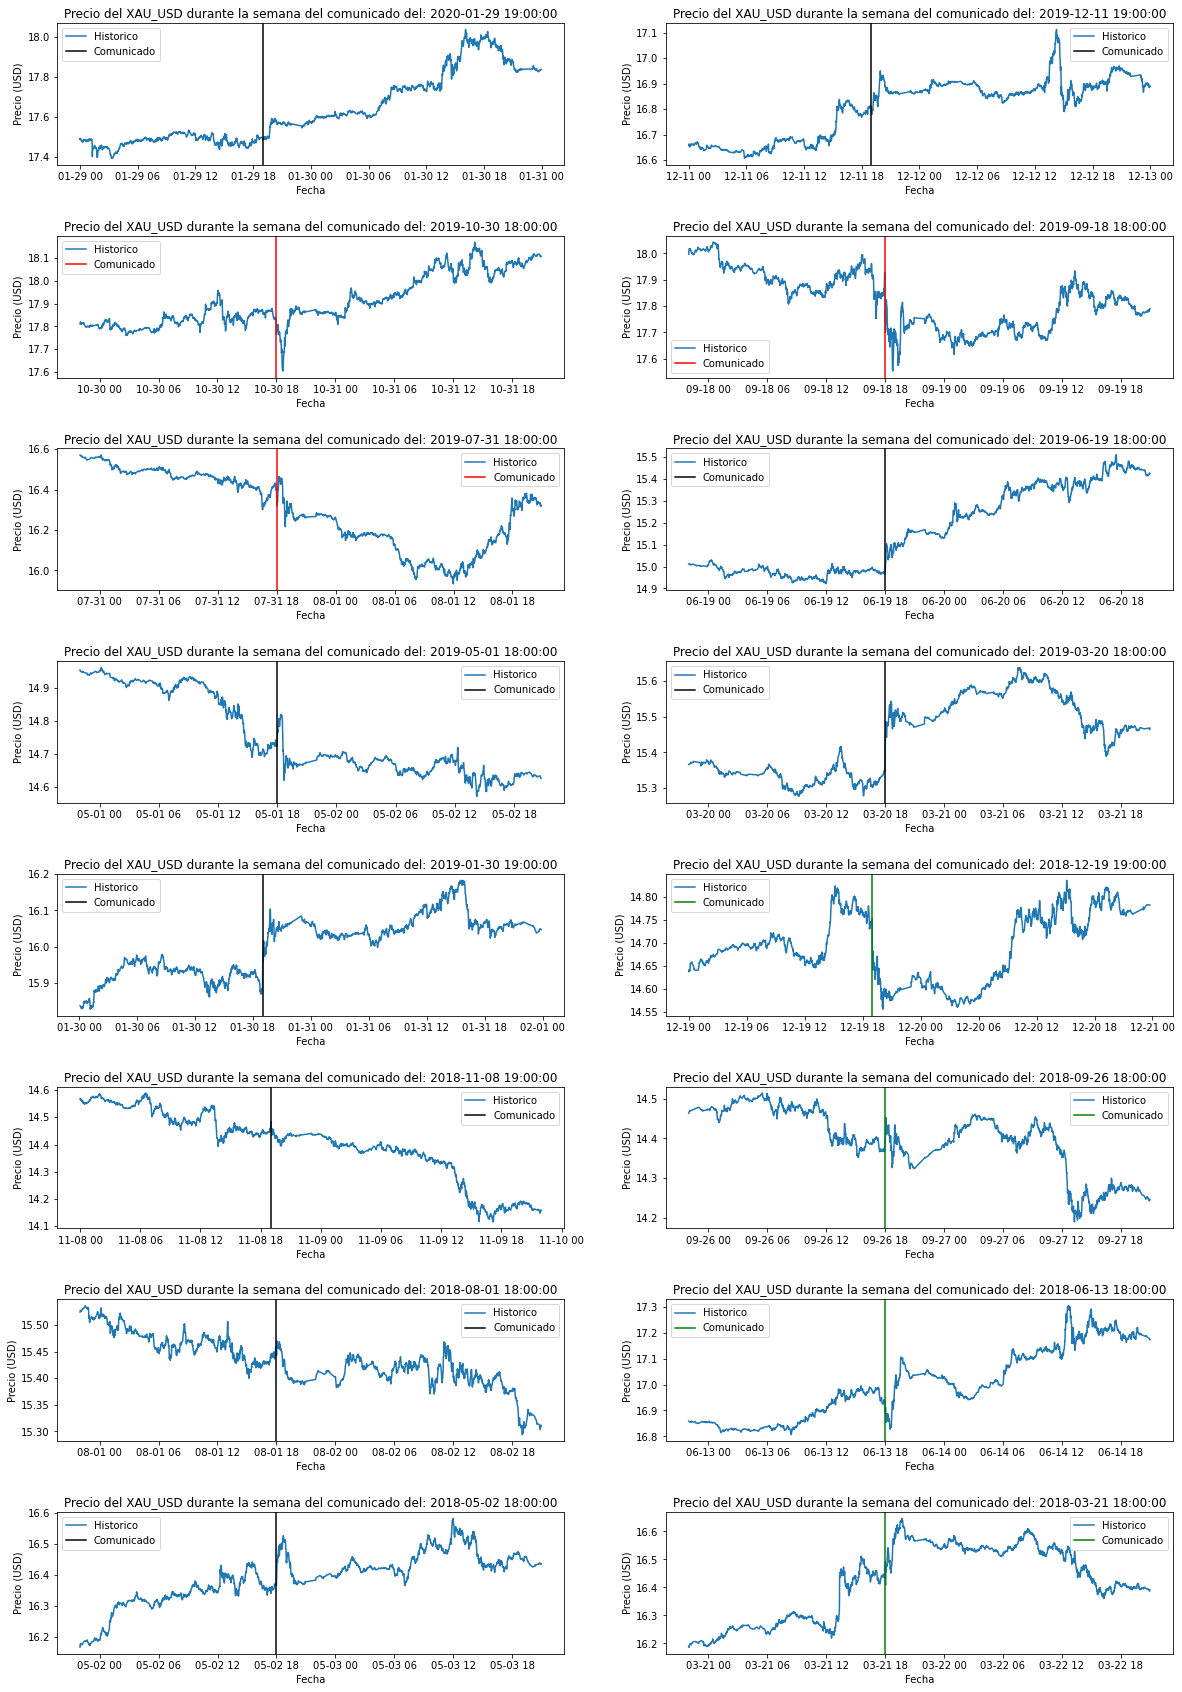

In [6]:
# Ahora hacemos unas graficas para los comunicados
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(8,2,i+1)
    plt.plot(list_dfs[i]['TimeStamp'], list_dfs[i]['Mid'], label='Historico')
    # Asignaremos un color a la línea vertical para diferencial los Consensos de cada uno.
    # Consenso Mayor a Previo
    if df.iloc[i,2] > df.iloc[i,3]:
        c = 'g'
    # Consenso Menor a Previo
    elif df.iloc[i,2] < df.iloc[i,3]:
        c = 'r'
    # Consenso Igual a Previo
    else:
        c = 'k'
    plt.axvline(df.iloc[i,0], color=c, label='Comunicado')
    plt.title('Precio del XAU_USD durante la semana del comunicado del: ' + str(df.iloc[i,0]))
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.subplots_adjust(hspace = 0.5)
plt.show()

Se observa como en la mayoría de los gráficos hay un "salto" en el precio al momento del comunicado, ya sea a la alza y a la baja.
Suponemos lo siguiente:
* Movernos de acuerdo al consenso:
    * Estamos atentos a el "Previous" y "Consensus"
    * Si el Consenso es SUPERIOR al Previo: Ponemos una posición LARGA
    * Si el Consenso es IINFERIOR al Previo: Ponemos una posición CORTA
    * Si el Consenso es IGUAL al Previo: Nuesta posición sigue la tendencia de las 
    * **Resultado: ** Acertamos: 14/16 veces = 87.5%
    
Con base a lo anterior, diseñamos lo siguiente de forma empírica:
* Sentido: De acuerdo a las condiciones mencionadas anteriormente.
* Volumen: 10 unidades
* Takeprofit: +300 pips si es largo, - 300 pips si es corto
* Stoploss: - 150 pips si es largo, + 150 pips si es corto
* Sin incremento progresivo de tamaño de posición.

# <font color= #6B6B6B> <font size = 6> 4. Aspectos Estadísticos </font>

<hr style="border:0.02in solid gray"> </hr>

Toda esta sección es utilizando los datos solamente del indicador, sólo la serie de tiempo del indicador. La forma de presentar esta información es libre, es decir, puedes dejar gráficas, texto explicativo, o una combinación de ambos. 

* 1.- Para el indicador elegido se debe de tener información sobre:
    * 1.-Serie de tiempo del valor "actual".
    * 2.-Caracterización econométrica.
        * 1.-Componente de Autocorrelación y Autocorrelación Parcial.
        * 2.-Prueba de Heterocedasticidad.
        * 3.-Prueba de Normalidad.
        * 4.-Estacionalidad.
        * 5.-Estacionariedad.
        * 6.-Detección de Atípicos.

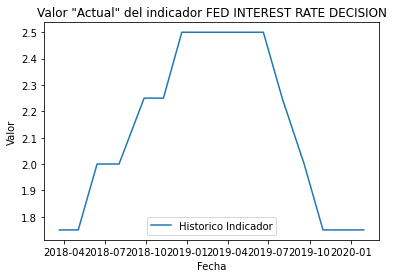

In [7]:
# Serie de Timpo del Valor Actual
plt.plot(df['DateTime'], df['Actual'], label='Historico Indicador')
plt.title('Valor "Actual" del indicador FED INTEREST RATE DECISION')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

### Caracterización Econométrica
#### Autocorrelación Simple:

$$ r_{k}  = \frac{\sum_{t=1}^{n-k}(Y_{t}-\bar{Y})(Y_{t+k}-\bar{Y})}{\sum_{t=1}^{n}(Y_{t}-\bar{Y})^2}$$
donde:
* $r_{k}$: Es el coeficiente de autocorrelación simple para un retraso de $k$ periodos.
* $\bar{Y}$: media de los valores de la serie
* $Y_{t}$: Observación en el periodo $t$
* $Y_{t+k}$: Observación en el peridodo con $k$ retrasos
* $n$: número total de periodos

http://www.ptolomeo.unam.mx:8080/jspui/bitstream/132.248.52.100/363/5/A5.pdf

In [8]:
# relacion Lineal entre las observaciones y la distancia de tiempo k de los rezagos
# Lo haremos con un rezago
k = 1  # Rezagos
Y_test = df['Actual'].mean()
Y_tk = df['Actual'].shift(k)
rk = (sum((df['Actual'][k:len(df)]-Y_test)*(Y_tk[k:len(df)]-Y_test)))/(sum((df['Actual']-Y_test)**2))
rk

0.78125

#### Autocorrelación Parcial:
$$ r_{kk} = \begin{cases}r_{1}, & \text{si } k=1 \\
            \frac{r_{k}- \sum_{j=1}^{k-1} r_{k-1 j} r_{k-j}}{1- \sum_{j=1}^{k-1} r_{k-1 j} r_{k}}, & \text{si } k= 2,3,4,5,... \end{cases}$$
donde:
* $r_{kk}$: Es el coeficiente de autocorrelación parcial para un retraso de $k$ y $j$ periodos.

In [9]:
# relacion entre la serie y los k rezagos de si misma.
# Lo haremos con un rezago
rkk = rk
rkk

0.78125

#### Prueba de Heterocedasticidad

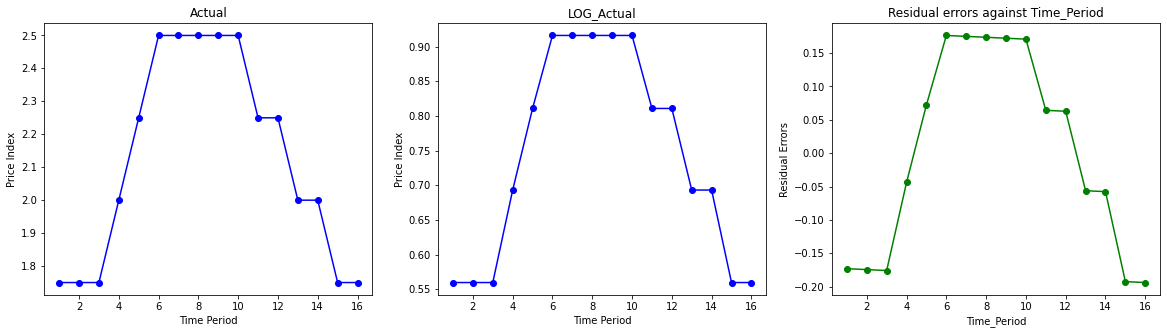

Los errores no son constantes, por tanto es Heterocedástica
                            OLS Regression Results                            
Dep. Variable:               SQ_RESID   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.5759
Date:                Tue, 01 Dec 2020   Prob (F-statistic):              0.576
Time:                        18:05:06   Log-Likelihood:                 46.502
No. Observations:                  16   AIC:                            -87.00
Df Residuals:                      13   BIC:                            -84.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [10]:
# https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f

df2 = df
df2 = df2.set_index('DateTime')
df2['Time_Period'] = range(1, len(df2)+1)
df2['LOG_Actual'] = np.log(df2['Actual'])
#Create a new mpyplot figure to plot into
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Actual')
plt.xlabel('Time Period')
plt.ylabel('Price Index')
plt.plot(df2['Time_Period'], df2['Actual'], 'bo-', label='Actual')
plt.subplot(1,3,2)
plt.title('LOG_Actual') 
plt.xlabel('Time Period')
plt.ylabel('Price Index')
plt.plot(df2['Time_Period'], df2['LOG_Actual'], 'bo-', label='LOG_Actual')
expr = 'LOG_Actual ~ Time_Period'
olsr_results = smf.ols(expr, df2).fit()
plt.subplot(1,3,3)
plt.title('Residual errors against Time_Period')
plt.xlabel('Time_Period')
plt.ylabel('Residual Errors')
plt.plot(df2['Time_Period'], olsr_results.resid, 'go-', label='Residual Errors')
plt.show()
# Homo es constante:
# Hetero es no constante:
print('Los errores no son constantes, por tanto es Heterocedástica')
df2['SQ_RESID'] = np.power(olsr_results.resid, 2.0)
df2['SQ_Time_Period'] = np.power(df2['Time_Period'], 2.0)
aux_expr = 'SQ_RESID ~ Time_Period + SQ_Time_Period'
y, X = dmatrices(aux_expr, df2, return_type='dataframe')
X = sm.add_constant(X)
aux_olsr_results = sm.OLS(y, X).fit()
print(aux_olsr_results.summary())
# R-squared: The model has been able to explain only 0.8% of the variance in the squared residuals, 
#            indicating a rather poor fit.
# F-statistic: The very high p-value of 0.593 makes us accept the null hypothesis of the F-test that the 
#              model’s parameter values are not jointly significant. This model is no better than a mean model.

#### Prueba de Normalidad

Parátrós de la distribución normal que mejor se acomodan a los datos (mu,sigma).
(2.125, 0.2795084971874737)


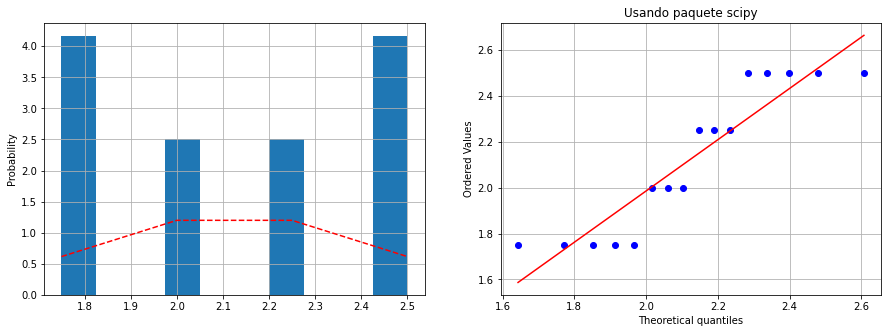

Son pocos datos para poder decir que sigue una distribución normal pero se asemeja a una con curtosis de tipo "mesokurtica" (achatada, alargada en las colas).


In [11]:
# DATA
measurements_1 = np.array(df.iloc[:,1])    
# Parametros de las distribuciones
dist_1 = 'norm'
# GRAFICOS 
plt.figure(figsize=(15,5))
# PRIMERA DISTRIBUCIÓN
plt.subplot(1,2,1)
plt.hist(measurements_1,density=True)  # Histograma
params = getattr(st, dist_1).fit(measurements_1)  # Parametros de la distribución que mejor se acomodan
x = np.arange(measurements_1.min(), measurements_1.max()+0.25, 0.25)  # Espacio en X
y = getattr(st, dist_1).pdf(x, *params)  # Graficar PDF de la distribución que queremos probar
plt.plot(x,y,'r--')  # si siguiera la distribucion normal , los datos se ajustarian a la línea roja.
plt.ylabel('Probability')
plt.grid()
# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist): Usando scipy
plt.subplot(1,2,2)
grap2 = st.probplot(measurements_1, dist=dist_1, sparams=getattr(st, dist_1).fit(x)[:], plot=plt.subplot(1,2,2), fit=True)
plt.grid()
plt.title('Usando paquete scipy')
print('Parátrós de la distribución normal que mejor se acomodan a los datos (mu,sigma).')
print(getattr(st, dist_1).fit(x)[:])
plt.show()
print('Son pocos datos para poder decir que sigue una distribución normal pero se asemeja a una con curtosis de tipo "mesokurtica" (achatada, alargada en las colas).')

#### Estacionalidad

Basta observar la gráfica de la serie de tiempo para observar que no es estacional.


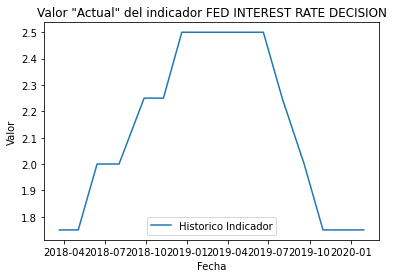

In [12]:
print('Basta observar la gráfica de la serie de tiempo para observar que no es estacional.')
# Serie de Timpo del Valor Actual
plt.plot(df['DateTime'], df['Actual'], label='Historico Indicador')
plt.title('Valor "Actual" del indicador FED INTEREST RATE DECISION')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#### Estacionariedad

In [13]:

X = measurements_1
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# Entre más negativo sea el valor stadístico (ADF Statistic), Es más probable rechazar la hipotesis nula:
# La data es estacionaria.
print('La serie de tiempo NO es estacionaria.')

ADF Statistic: -1.230077
p-value: 0.660525
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
La serie de tiempo NO es estacionaria.


#### Detección de Atípicos.

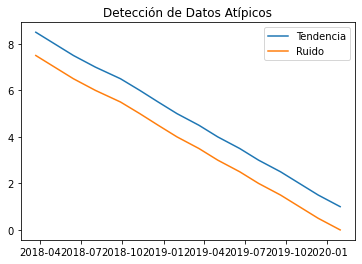

Como no se observan saltos en la línea naranja, no hay datos atípicos del indicador.


In [14]:
# Prueba para datos atípicos:
# El promedio movil puede funcionar como un filtro, aplicandolo como una medida de la relación 
# tendencia/ruido
t = df.iloc[:,0]
y_test = pd.Series(df.index + 1)
m = len(t)
T = list(np.ones(m))
for i in np.arange(m):
    T[i] = np.mean(y_test[np.max([0,i-m]):(i+1)])
plt.figure()
plt.plot(t, T, label = 'Tendencia')
N = y_test - T
plt.plot(t,N, label='Ruido')
plt.title('Detección de Datos Atípicos')
plt.legend()
plt.show()
np.std(N)
# https://stats.stackexchange.com/questions/427327/simple-outlier-detection-for-time-series
print('Como no se observan saltos en la línea naranja, no hay datos atípicos del indicador.')

<br>

# <font color= #6B6B6B> <font size = 6> 5. Aspectos computacionales </font>

<hr style="border:0.02in solid gray"> </hr>

Se definen 4 escenarios respecto a los valores que pueden tener el comunicado respecto al consenso y el previo y con eso se pretende en la sección de Backtest hacer un modelo que optimice parámetros y maxiizar la ganancia.
* Escenario A: Actual >= Consensus >= Previous
* Escenario B: Actual >= Consensus <  Previous
* Escenario C: Actual <  Consensus >= Previous
* Escenario D: Actual <  Consensus <  Previous

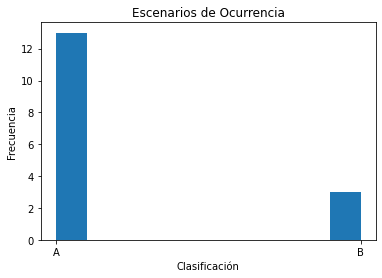

In [15]:
df['Clasificación'] = 0
for i in range(len(df)):
    if df.iloc[i,1] >= df.iloc[i,2] >= df.iloc[i,3]:
        df.iloc[i,5] = 'A' 
    elif df.iloc[i,1] >= df.iloc[i,2] < df.iloc[i,3]:
        df.iloc[i,5] = 'B' 
    elif df.iloc[i,1] < df.iloc[i,2] >= df.iloc[i,3]:
        df.iloc[i,5] = 'C'        
    elif df.iloc[i,1] < df.iloc[i,2] < df.iloc[i,3]:
        df.iloc[i,5] = 'D'
plt.hist(df.Clasificación)
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.title('Escenarios de Ocurrencia')
plt.show()

In [16]:
# De los datos descargados de velas de 1 minuto eliminamos todos los valores de 15 minutos antes del comunicado
list_dfs_2 = [list_dfs[a][list_dfs[a]['TimeStamp'] >= str(df['DateTime'][a]-timedelta(minutes=15))] for a in range(len(df))]
# De los datos anteriores eliminamos todos los valores de 15 minutos despúes del comunicado
list_dfs_3 = [list_dfs_2[a][list_dfs_2[a]['TimeStamp'] <= str(df['DateTime'][a]+timedelta(minutes=15))] for a in range(len(df))]
# Ahora hay que reacomodar los índices:
list_dfs_4 = [list_dfs_3[a].reset_index(drop=True) for a in range(len(list_dfs_3))]

In [17]:
direccion = []
pips_alcistas = []
pips_bajistas = []
volatilidad = []
for a in range(len(list_dfs_4)):
    # Se definen los números de los indices porque OANDA no tiene todas las velas de 1 minuto para todos los periodos
    # en otras palabras, faltan velas de 1 minuto.
    t_0_idx = list_dfs_4[a].index[list_dfs_4[a]['TimeStamp'] == str(df['DateTime'][a])][0]  # indice en tiempo 0
    t_30_idx = len(list_dfs_4[a])-1  # indice en tiempo 15
    # el indice en tiempo -15 se obia como "0"
    direccion.append((list_dfs_4[a]['Close'][t_30_idx] - list_dfs_4[a]['Open'][t_0_idx])*10000)
    pips_alcistas.append((max(list_dfs_4[a]['High'][t_0_idx:t_30_idx]) - list_dfs_4[a]['Open'][t_0_idx])*10000)
    pips_bajistas.append((list_dfs_4[a]['Open'][t_0_idx] - min(list_dfs_4[a]['Low'][t_0_idx:t_30_idx]))*10000)
    volatilidad.append((max(list_dfs_4[a]['High'][0:t_30_idx]) - min(list_dfs_4[a]['Low'][0:t_30_idx]))*10000)
df['direccion'] = [int(round(num, 0)) for num in direccion]
df['pips_alcistas'] = [int(round(num, 0)) for num in pips_alcistas]
df['pips_bajistas'] = [int(round(num, 0)) for num in pips_bajistas]
df['volatilidad'] = [int(round(num, 0)) for num in volatilidad]
df

,DateTime,Actual,Consensus,Previous,Revised,Clasificación,direccion,pips_alcistas,pips_bajistas,volatilidad
0,2020-01-29 19:00:00,1.75,1.75,1.75,NaN,A,57,124,150,274
1,2019-12-11 19:00:00,1.75,1.75,1.75,NaN,A,620,534,421,955
2,2019-10-30 18:00:00,1.75,1.75,2.00,NaN,B,-657,0,1252,1366
3,2019-09-18 18:00:00,2.00,2.00,2.25,NaN,B,-2072,26,3059,3655
4,2019-07-31 18:00:00,2.25,2.25,2.50,NaN,B,93,440,1291,1731
5,2019-06-19 18:00:00,2.50,2.50,2.50,NaN,A,843,1382,22,1465
6,2019-05-01 18:00:00,2.50,2.50,2.50,NaN,A,395,665,203,923
7,2019-03-20 18:00:00,2.50,2.50,2.50,NaN,A,1132,1335,0,1570
8,2019-01-30 19:00:00,2.50,2.50,2.50,NaN,A,1273,1564,23,1634
9,2018-12-19 19:00:00,2.50,2.50,2.25,NaN,A,-1057,45,1212,1312


# <font color= #6B6B6B> <font size = 6> 6. Backtest </font>

<hr style="border:0.02in solid gray"> </hr>

In [18]:
# Crear df escenarios
Cap_Ini = 100000
Riesgo_Max = 1000
df_escenarios = df[['DateTime', 'Clasificación', 'direccion','pips_alcistas', 'pips_bajistas', 'volatilidad']]
df_escenarios['direccion'] = df['direccion'].apply(lambda x: -1 if x < 0 else 1)
# Ahora acomodamos los DF para que vayan desde la fecha más antigua, a la más reciente
df_escenarios = df_escenarios.sort_values(by='DateTime')
df_escenarios_train = df_escenarios.iloc[0:8,:].reset_index(drop=True)
df_escenarios_test = df_escenarios.iloc[8:,:].reset_index(drop=True)
print('El análisis de estos datos de entrenamiento está cesgado porque solo hay un tipo de clasificación (A)')
df_escenarios_train

El análisis de estos datos de entrenamiento está cesgado porque solo hay un tipo de clasificación (A)


,DateTime,Clasificación,direccion,pips_alcistas,pips_bajistas,volatilidad
0,2018-03-21 18:00:00,A,1,674,754,1428
1,2018-05-02 18:00:00,A,1,1384,58,1456
2,2018-06-13 18:00:00,A,-1,69,826,1072
3,2018-08-01 18:00:00,A,1,260,129,423
4,2018-09-26 18:00:00,A,1,839,165,1009
5,2018-11-08 19:00:00,A,-1,377,329,705
6,2018-12-19 19:00:00,A,-1,45,1212,1312
7,2019-01-30 19:00:00,A,1,1564,23,1634


In [19]:
# Crear df decisiones
# Si aumenta la tasa la plata se deprecia, si disminuye la tasa, la plata se aprecia.
df_escenarios = pd.DataFrame()
df_escenarios['escenarios'] = ['A', 'B', 'C', 'D']
df_escenarios['operacion'] = ['compra', 'venta', 'compra', 'venta']
df_escenarios['sl'] = [100, 100, 100, 100]
df_escenarios['tp'] =[200, 200, 200, 200]
df_escenarios['volumen'] = [4500, 4500, 4500, 4500]
df_escenarios

,escenarios,operacion,sl,tp,volumen
0,A,compra,100,200,4500
1,B,venta,100,200,4500
2,C,compra,100,200,4500
3,D,venta,100,200,4500


In [20]:
# Crear df Backtest 
# Esta función Usa los parametros de Take Profit, Stop Loss y Volumen y va iterando para calcular la ganancia
def fun_opt_ganacia_fundamental(df_backtest,vol,tp,st):
    df_backtest['Operación'] = df_backtest['Clasificación'].apply(lambda x: 'venta' if (x == 'A' or x == 'C') else 'compra')
    df_backtest['Volumen'] = vol*100 # Consideramos apalancamiento 100 a 1 para poder hacer esto.
    df_backtest['Resultado'] = 0
    df_backtest['Pips'] = 0
    df_backtest['Capital'] = 0
    df_backtest['Capital_Acm'] = 100000
    for i in range(len(df_backtest)):
        if (df_backtest['Clasificación'][i] == 'A' or df_backtest['Clasificación'][i] == 'C'):  
            if (df_backtest['pips_alcistas'][i] >= df_backtest['pips_bajistas'][i]):
                df_backtest['Resultado'][i] = 'ganada'
                df_backtest['Pips'][i] = tp if df_backtest['pips_alcistas'][i] > tp else df_backtest['pips_alcistas'][i]
            else:
                df_backtest['Resultado'][i] = 'perdida'
                df_backtest['Pips'][i] = st if df_backtest['pips_bajistas'][i] > st else df_backtest['pips_bajistas'][i]
        else:
            if (df_backtest['pips_alcistas'][i] <= df_backtest['pips_bajistas'][i]):
                df_backtest['Resultado'][i] = 'ganada'
                df_backtest['Pips'][i] = tp if df_backtest['pips_bajistas'][i] > tp else df_backtest['pips_bajistas'][i]
            else:
                df_backtest['Resultado'][i] = 'perdida'
                df_backtest['Pips'][i] = st if df_backtest['pips_alcistas'][i] > st else df_backtest['pips_alcistas'][i]
        df_backtest['Capital'][i] = (df_backtest['Pips'][i]/10000)*df_backtest['Volumen'][i] if df_backtest['Resultado'][i] == 'ganada' else -(df_backtest['Pips'][i]/10000)*df_backtest['Volumen'][i]
        df_backtest['Capital_Acm'][i] = 100000 + sum(df_backtest.iloc[0:i+1,10])
    df_result = df_backtest[['DateTime', 'Clasificación', 'Operación', 'Volumen', 'Resultado', 'Pips', 'Capital', 'Capital_Acm']] 
    # display.display(df_result)
    return df_result.iloc[-1,-1]-100000

#### Optimización de Parámetros
1. Parámetro: 1
    * Nombre: Take Profit
    * Descripción: Cantidad de pips a partir del spot donde se activa el Take Profit
    * Tipo de valor: numérico
    * Rango de valores: 100-500
    * Tamaño de paso mínimo: 1
2. Parámetro: 2
    * Nombre: Stop Loss
    * Descripción: Cantidad de pips a partir del spot donde se activa el Stop Loss
    * Tipo de valor: numérico
    * Rango de valores: 50-150
    * Tamaño de paso mínimo: 1
3. Parámetro: 3
    * Nombre: Volumen
    * Descripción: El volumen de unidades para abrir una operación
    * Tipo de valor: numérico
    * Rango de valores: 800-1500
    * Tamaño de paso mínimo: 1

Mejor Resultado después de 100 iteraciones:
Max profit:18804
Take Profit óptimo:299
Stop Loss óptimo:50
Volumen óptimo:1440


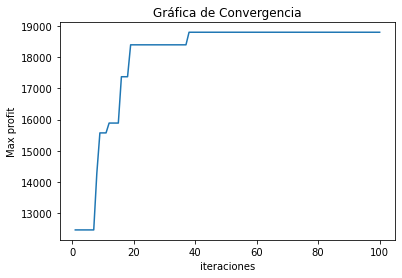

In [21]:
## Algotimos Geneticos: Con restricciones PSO
## Condiciones Iniciales
num_p = 10 # numero de pobladores
n_ite = 100 # numero de iteraciones 
# TP
TP_max = 300
TP_min = 100
# SL
SL_max = 150
SL_min = 50
# V
V_max = 1500
V_min = 800
## Take Profit
x1p = np.random.randint(TP_min,TP_max,num_p) # posicion inicial (de a cant)
x1pg = 0  # pocision inicial del global
x1pl = x1p # valores iniciales de los mejores locales
vx1 = np.zeros(num_p) # velocidad inicial de las particulas
## Stop Loss
x2p = np.random.randint(SL_min,SL_max,num_p) # posicion inicial (de a cant)
x2pg = 0  # pocision inicial del global
x2pl = x2p # valores iniciales de los mejores locales
vx2 = np.zeros(num_p) # velocidad inicial de las particulas
## Volumen
x3p = np.random.randint(V_min,V_max,num_p) # posicion inicial (de a cant)
x3pg = 0  # pocision inicial del global
x3pl = x3p # valores iniciales de los mejores locales
vx3 = np.zeros(num_p) # velocidad inicial de las particulas
## Parametros Iniciales
fxpg = 0 # Desempeño inicial del mejor global
fxpl = np.ones(num_p)*fxpg # desempeño de los mejores locales
c1 = 0.75 # velocidad de convergencia al mejor global
c2 = 0.75 # velocidad de convergencia al mejor local
# como el PSO busca maximizar, la penalizacion disminuye
a = 1000
x_iter = list()  #  Aqui guardamos los datos de x para la grafica de desempeño
y_iter = list()  #  Aqui guardamos los datos de y para la grafica de desempeño
## Funcionamiento
for k in range(n_ite): # iteraciones del algoritmo
    fx = np.ones(num_p)
    for j in range(num_p): # iteraciones del algoritmo
        fx[j] = fun_opt_ganacia_fundamental(df_escenarios_train,x3p[j],x1p[j],x2p[j]) - a*max(x1p[j]-TP_max,0) + a*min(x1p[j]-TP_min,0) - a*max(x2p[j]-SL_max,0) + a*min(x2p[j]-SL_min,0) - a*max(x3p[j]-V_max,0) + a*min(x3p[j]-V_min,0)
    # Determinar el máximo global
    val = max(fx)
    ind = list(fx).index(max(fx))
    if val>fxpg:
        x1pg = x1p[ind] # guardar la posicion del mejor
        x2pg = x2p[ind] # guardar la posicion del mejor
        x3pg = x3p[ind] # guardar la posicion del mejor
        fxpg = val # guardar el valor del mejor
    # Determinar el máximo local
    for p in range(num_p):
        if fx[p]>fxpl[p]:
            fxpl[p] = fx[p] # remplazo el valor del mejor local
            x1pl[p] = x1p[p] # remplazo la posicion del mejor local
            x2pl[p] = x2p[p] # remplazo la posicion del mejor local
            x3pl[p] = x3p[p] # remplazo la posicion del mejor local
    fx = fun_opt_ganacia_fundamental(df_escenarios_train,x3pg,x1pg,x2pg)
    # Ecuaciones de Movimineto
    vx1 = vx1+np.dot(c1*np.random.rand(),x1pg-x1p)+np.dot(c2*np.random.rand(),x1pl-x1p) # la velocidad
    x1p = np.round(vx1 + x1p,0).astype(int)  # Como son pips tienen que ser números enteros
    vx2 = vx2+np.dot(c1*np.random.rand(),x2pg-x2p)+np.dot(c2*np.random.rand(),x2pl-x2p) # la velocidad
    x2p = np.round(vx2 + x2p,0).astype(int)  # Como son pips tienen que ser números enteros
    vx3 = vx3+np.dot(c1*np.random.rand(),x3pg-x3p)+np.dot(c2*np.random.rand(),x3pl-x3p) # la velocidad
    x3p = np.round(vx3 + x3p,0).astype(int)  # Como son volumen tienen que ser números enteros
    x_iter.append(k+1)
    y_iter.append(fx)
print('Mejor Resultado después de ' + str(n_ite) + ' iteraciones:')
print('Max profit:' + str(fun_opt_ganacia_fundamental(df_escenarios_train,x3pg,x1pg,x2pg)))
print('Take Profit óptimo:' + str(x1pg))
print('Stop Loss óptimo:' + str(x2pg))
print('Volumen óptimo:' + str(x3pg))
plt.plot(x_iter,y_iter)
plt.title('Gráfica de Convergencia')
plt.xlabel('iteraciones')
plt.ylabel('Max profit')
plt.show()

In [22]:
# Misma Función que la anterior pero Imprime el DataFrame para que en el anterior no imprima en cada itearacion.
def fun_opt_ganacia_fundamental_disp(df_backtest,vol,tp,st):
    df_backtest['Operación'] = df_backtest['Clasificación'].apply(lambda x: 'venta' if (x == 'A' or x == 'C') else 'compra')
    df_backtest['Volumen'] = vol*100 # Consideramos apalancamiento 100 a 1 para poder hacer esto.
    df_backtest['Resultado'] = 0
    df_backtest['Pips'] = 0
    df_backtest['Capital'] = 0
    df_backtest['Capital_Acm'] = 100000
    for i in range(len(df_backtest)):
        if (df_backtest['Clasificación'][i] == 'A' or df_backtest['Clasificación'][i] == 'C'):  
            if (df_backtest['pips_alcistas'][i] >= df_backtest['pips_bajistas'][i]):
                df_backtest['Resultado'][i] = 'ganada'
                df_backtest['Pips'][i] = tp if df_backtest['pips_alcistas'][i] > tp else df_backtest['pips_alcistas'][i]
            else:
                df_backtest['Resultado'][i] = 'perdida'
                df_backtest['Pips'][i] = st if df_backtest['pips_bajistas'][i] > st else df_backtest['pips_bajistas'][i]
        else:
            if (df_backtest['pips_alcistas'][i] <= df_backtest['pips_bajistas'][i]):
                df_backtest['Resultado'][i] = 'ganada'
                df_backtest['Pips'][i] = tp if df_backtest['pips_bajistas'][i] > tp else df_backtest['pips_bajistas'][i]
            else:
                df_backtest['Resultado'][i] = 'perdida'
                df_backtest['Pips'][i] = st if df_backtest['pips_alcistas'][i] > st else df_backtest['pips_alcistas'][i]
        df_backtest['Capital'][i] = (df_backtest['Pips'][i]/10000)*df_backtest['Volumen'][i] if df_backtest['Resultado'][i] == 'ganada' else -(df_backtest['Pips'][i]/10000)*df_backtest['Volumen'][i]
        df_backtest['Capital_Acm'][i] = 100000 + sum(df_backtest.iloc[0:i+1,10])
    df_result = df_backtest[['DateTime', 'Clasificación', 'Operación', 'Volumen', 'Resultado', 'Pips', 'Capital', 'Capital_Acm']] 
    display.display(df_result)
    return [df_result, df_result.iloc[-1,-1]-100000]

#### Resultados de la Optimización con los Datos de Entrenamiento

,DateTime,Clasificación,Operación,Volumen,Resultado,Pips,Capital,Capital_Acm
0,2018-03-21 18:00:00,A,venta,144000,perdida,50,-720,99280
1,2018-05-02 18:00:00,A,venta,144000,ganada,299,4305,103585
2,2018-06-13 18:00:00,A,venta,144000,perdida,50,-720,102865
3,2018-08-01 18:00:00,A,venta,144000,ganada,260,3744,106609
4,2018-09-26 18:00:00,A,venta,144000,ganada,299,4305,110914
5,2018-11-08 19:00:00,A,venta,144000,ganada,299,4305,115219
6,2018-12-19 19:00:00,A,venta,144000,perdida,50,-720,114499
7,2019-01-30 19:00:00,A,venta,144000,ganada,299,4305,118804


la ganancia es de: 18804 USD.


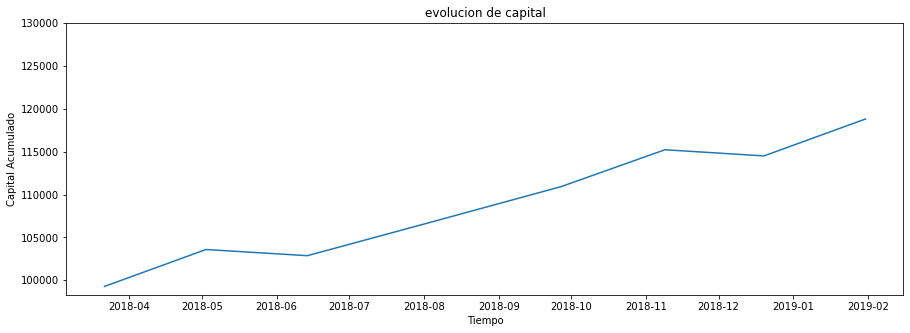

In [23]:
exp_ = fun_opt_ganacia_fundamental_disp(df_escenarios_train,x3pg,x1pg,x2pg) # esperimento de la función
print('la ganancia es de: ' + str(exp_[1]) + ' USD.')
plt.figure(figsize=(15,5))
plt.plot(exp_[0]['DateTime'], exp_[0]['Capital_Acm'])
plt.title('evolucion de capital')
plt.xlabel('Tiempo')
plt.ylabel('Capital Acumulado')
plt.yticks(range(100000, 130000+1,5000))
plt.show()

#### Resultados de la Optimización con los Datos de Prueba

,DateTime,Clasificación,Operación,Volumen,Resultado,Pips,Capital,Capital_Acm
0,2019-03-20 18:00:00,A,venta,144000,ganada,299,4305,104305
1,2019-05-01 18:00:00,A,venta,144000,ganada,299,4305,108610
2,2019-06-19 18:00:00,A,venta,144000,ganada,299,4305,112915
3,2019-07-31 18:00:00,B,compra,144000,ganada,299,4305,117220
4,2019-09-18 18:00:00,B,compra,144000,ganada,299,4305,121525
5,2019-10-30 18:00:00,B,compra,144000,ganada,299,4305,125830
6,2019-12-11 19:00:00,A,venta,144000,ganada,299,4305,130135
7,2020-01-29 19:00:00,A,venta,144000,perdida,50,-720,129415


la ganancia es de: 29415 USD.


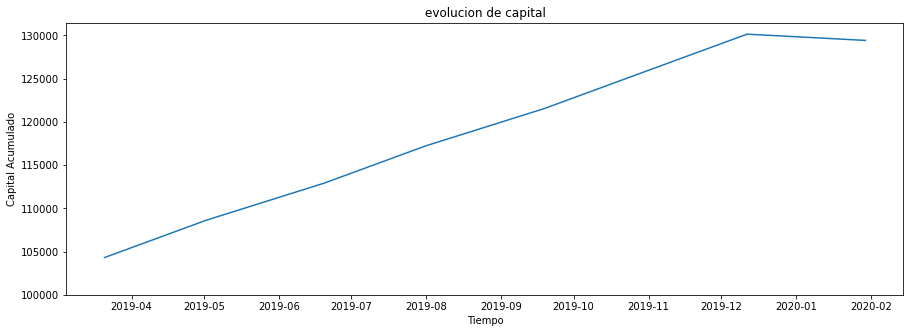

In [24]:
exp_ = fun_opt_ganacia_fundamental_disp(df_escenarios_test,x3pg,x1pg,x2pg) # esperimento de la función
print('la ganancia es de: ' + str(exp_[1]) + ' USD.')
plt.figure(figsize=(15,5))
plt.plot(exp_[0]['DateTime'], exp_[0]['Capital_Acm'])
plt.title('evolucion de capital')
plt.xlabel('Tiempo')
plt.ylabel('Capital Acumulado')
plt.yticks(range(100000, 130000+1,5000))
plt.show()

#### Medidas de Atribución al Desempeño (MAD)

In [25]:
# FUN f_estadisticas_mad
# Data con cada metrica para valores diarios
# Sharpe,DrawDown & DrawUp
def f_estadisticas_mad(param_data):
    df = param_data
    # rp: Promedio de los rendimientos logarítmicos de profit_acm_d
    ren_log = np.log(df['Capital_Acm'] / df['Capital_Acm'].shift(1)).iloc[1:].cumsum()
    rp = np.mean(ren_log)  # promedio de log calculados
    sdp = ren_log.std()  # desv de los rendimientos
    rf = .05 / 8  # rf: 5% y estamos usando 8 periodos anuales
    # Sharpe Ratio
    sharpe = (rp - rf) / sdp
    # DrawDown
    # Minusvalia máxima que se registró en la evolución de los valores (de 'profit_acm_d')
    # Fecha Inicial", "Fecha Final", "DrawDown $ (capital)
    DD = 0
    for i in range(len(df)):
            for j in range(i,len(df)):
                val = min([df.iloc[j,2]-df.iloc[i,2],0])
                DD = min(DD,val)
    # DrawUp
    # Plusvalía máxima que se registró en la evolución de los valores (de 'profit_acm_d')
    # Fecha Inicial", "Fecha Final", "DrawUp $ (capital)
    DU = 0
    for i in range(len(df)):
            for j in range(i,len(df)):
                val = max([df.iloc[j,2]-df.iloc[i,2],0])
                DU = max(DU,val)
    mad = {'Metrica': ['Sharpe', 'Drawdown_capi', 'Drawup_capi'],
           'Valor': [sharpe, DD, DU],
           'Descripción': ['Sharpe Ratio', 'DrawDown de Capital', 'DrawUp de Capital']}
    df_mad = pd.DataFrame(mad)
    return df_mad

In [26]:
df_data_MAD = exp_[0][['DateTime', 'Capital', 'Capital_Acm']]
# Agregamos al DF la columna con capital incial de 100,000 para calcular el DrawDown y DrawUp
data_start = []
data_start.insert(0, {'DateTime':df_data_MAD.iloc[0,0]-timedelta(minutes=1), 'Capital':0, 'Capital_Acm':100000})
df_data_MAD = pd.concat([pd.DataFrame(data_start), df_data_MAD], ignore_index=True)
MAD = f_estadisticas_mad(df_data_MAD)
MAD

,Metrica,Valor,Descripción
0,Sharpe,1.982829,Sharpe Ratio
1,Drawdown_capi,-720.000000,DrawDown de Capital
2,Drawup_capi,30135.000000,DrawUp de Capital


<br>

# <font color= #6B6B6B> <font size = 6> 7. Conclusiones </font>

<hr style="border:0.02in solid gray"> </hr>

Se concluye que para el activol XAG_USD durante el comunicado del indicador FED INTEREST RATE DECISION de la economía USA conviene obervar los escenarios:
* Escenario A: Actual >= Consensus >= Previous
* Escenario B: Actual >= Consensus <  Previous
* Escenario C: Actual <  Consensus >= Previous
* Escenario D: Actual <  Consensus <  Previous

Para los escenarios A y C hay que comprar y los escenarios B y D hay que vender fijando como parametros los siguientes:
* Take Profit óptimo:299
* Stop Loss óptimo:50
* Volumen óptimo:1440

Con dichos parámetros se maximiza la ganancia.